## Analiza temperatury w Polsce na wybranych przykładach (dane z okresu 1901-2016)

Dane pobrane z: [worldbank.org](worldbank.org).

Plik CSV: https://climateknowledgeportal.worldbank.org/api/data/get-download-data/historical/tas/1901-2016/POL/Poland

In [1]:
data = {}

with open("tas_1901_2016_POL.csv") as f:

    # przeczytaj plik, iteruj po liniach...
    for line in f.readlines():

        # wyłuskaj interesujące nas wartości
        t_str, y_str, m_str = line.split(",")

        # konwertuj odczytane wartości na odpowiednie typy
        t, y, m = float(t_str), int(y_str), m_str.strip().lower()

        # zapisz do zmiennej
        data[y] = data.get(y, {})
        data[y][m] = t

### Przykład 1. Najzimniejszy oraz najcieplejszy miesiąc w Polsce

In [2]:
# dane początkowe
top_y, top_m, top_t = 0, 0, 0
bot_y, bot_m, bot_t = 0, 0, 0

# przez każdy rok w zestawie danych...
for year in data:

    # przygotuj słowniki po wartościach temperatur i nazwach miesięcy
    months = data[year].values()
    temperatures = {v: k for k, v in data[year].items()}

    # znajdź minima i maksima
    max_months, min_months = max(months), min(months)

    # dokonaj porównania z poprzednimi wartościami
    if top_t < max_months:
        top_y = year
        top_t = max_months
        top_m = temperatures[top_t]

    if bot_t > min_months:
        bot_y = year
        bot_t = min_months
        bot_m = temperatures[bot_t]

# wypisz wyniki
print(f"Najniższa średnia temperatura wystąpiła {bot_m} {bot_y}: {bot_t}°C")
print(f"Najwyższa średnia temperatura wystąpiła {top_m} {top_y}: {top_t}°C")

Najniższa średnia temperatura wystąpiła jan 1942: -10.882°C
Najwyższa średnia temperatura wystąpiła jul 1994: 21.1785°C


### Przygotuj notes do wyświetlania wykresów

In [3]:
# zaimportuj bibliotekę do obsługi wykresów
from matplotlib import pyplot as plt

# rysuj wykres w notatniku
%matplotlib inline

# ustaw rozmiar wykresu
plt.rcParams["figure.figsize"] = (20.0, 10.0)

Stwórz funkcję pomocniczą do rysowania wykresów w wygodny sposób.

In [4]:
def graph(ox, oy, margin_x=5, step_x=10, margin_y=2, step_y=2):
    plt.grid()
    plt.legend()
    plt.xlabel("Rok")
    plt.ylabel("Temperatura")
    plt.title("Wykres średniej temperatury")

    min_x, max_x = round(min(ox)) - margin_x, round(max(ox)) + margin_x
    min_y, max_y = round(min(oy)) - margin_y, round(max(oy)) + margin_y
    plt.xticks(range(int(min_x), int(max_x), step_x))
    plt.yticks(range(int(min_y), int(max_y), step_y))

### Przykład 2. Zaprezentuj odkryte minimum i maksimum temperatur za pomocą wykresów

Najcieplejszy rok na przestrzeni miesięcy

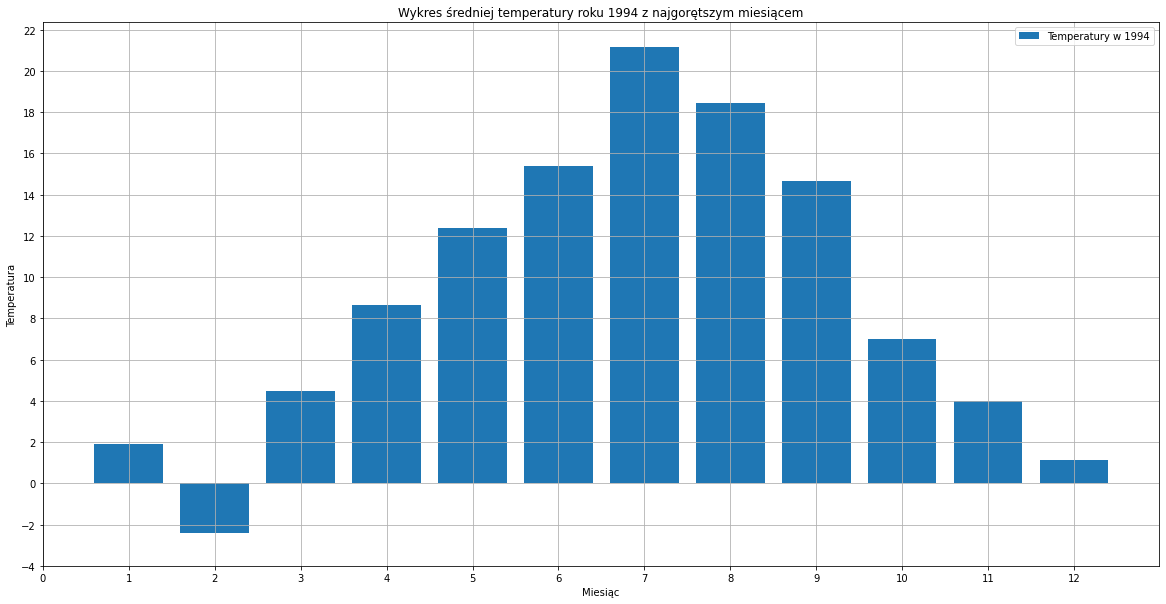

In [5]:
# przygotuj dane, oś OX
x = range(1, len(data[top_y].keys())+1)
y = list(data[top_y].values())

# narysuj dane
plt.bar(x, y, label=f"Temperatury w {top_y}")
graph(x, y, step_x=1, margin_x=1)

# popraw labelki
plt.title(f"Wykres średniej temperatury roku {top_y} z najgorętszym miesiącem")
plt.xlabel("Miesiąc")
plt.show()

Najzimniejszy rok na przestrzeni miesięcy

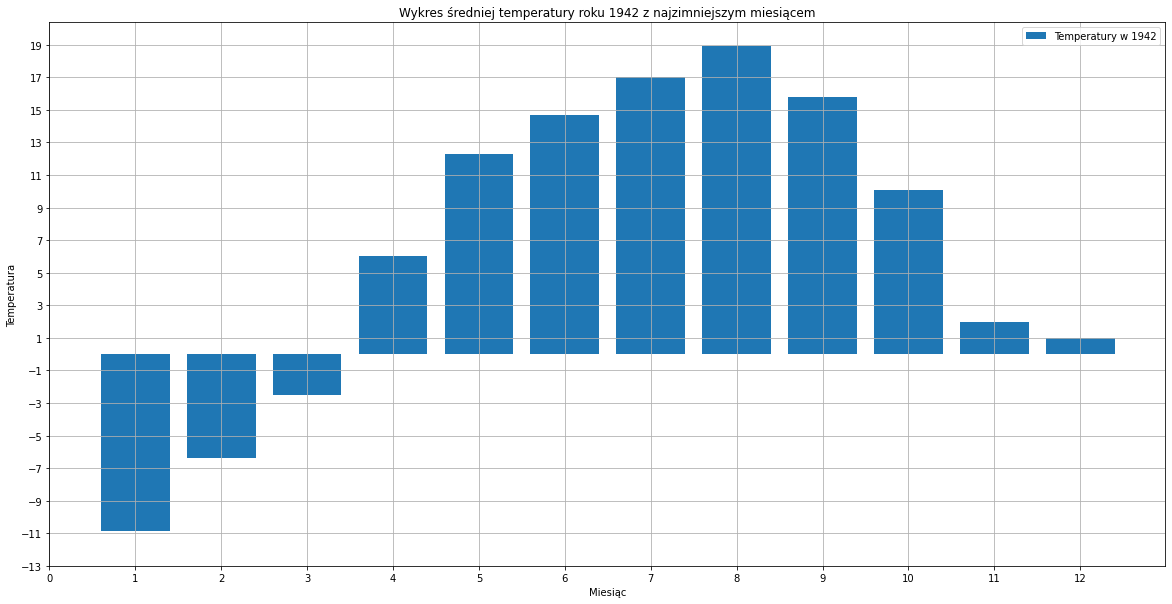

In [6]:
# przygotuj dane, oś OX
x = range(1, len(data[bot_y].keys())+1)
y = list(data[bot_y].values())

# narysuj dane
plt.bar(x, y, label=f"Temperatury w {bot_y}")
graph(x, y, step_x=1, margin_x=1)

# popraw labelki
plt.title(f"Wykres średniej temperatury roku {bot_y} z najzimniejszym miesiącem")
plt.xlabel("Miesiąc")
plt.show()

### Przykład 3. Na podstawie informacji o najgorętszym miesiącu roku przygotuj wykres wzrostu średniej temperatury w okresie wakacyjnym na przestrzeni lat.

Najgorętszym miesiącem był lipiec więc to głównie na nim oprzemy naszą analizę.

In [7]:
# przygotuj dane
x = list(data.keys())
jun_y = [data[y]["jun"] for y in data.keys()]
jul_y = [data[y]["jul"] for y in data.keys()]

Tu następuje faktyczne rysowanie wykresu dla miesięcy wakacyjnych.

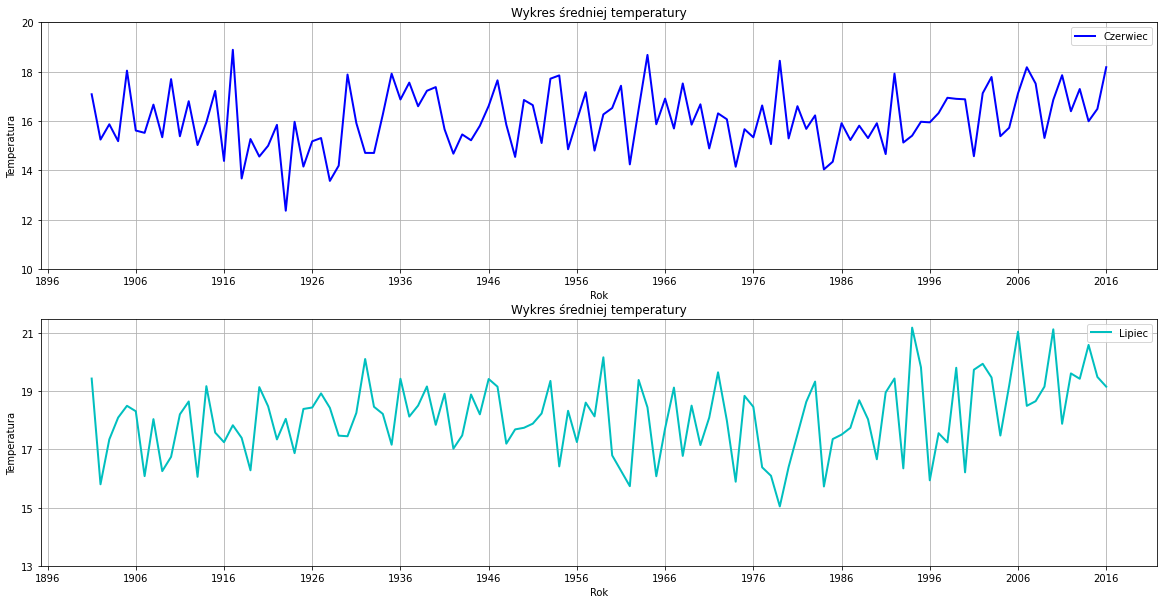

In [8]:
# pierwszy zestaw danych
plt.subplot(2, 1, 1)
plt.plot(x, jun_y, "b", label="Czerwiec", linewidth=2)
graph(x, jun_y)

# drugi zestaw danych
plt.subplot(2, 1, 2)
plt.plot(x, jul_y, "c", label="Lipiec", linewidth=2)
graph(x, jul_y)

# pokaż wykres
plt.show()

### Przykład 4: Hipoteza: Dane sugerują stabilny poziom średniej miesięcznej temperatury na przestrzeni prawie stu lat, ale ostatnie dwadzieścia lat zdają się mieć znaczący trend wzrostowy.

Aby się temu lepiej przyjrzeć, wygładzę dane korzystając z filtra Gaussa
oraz nałożę na siebie wykresy by móc wygodniej porównać trend
sąsiadujących ze sobą miesięcy.

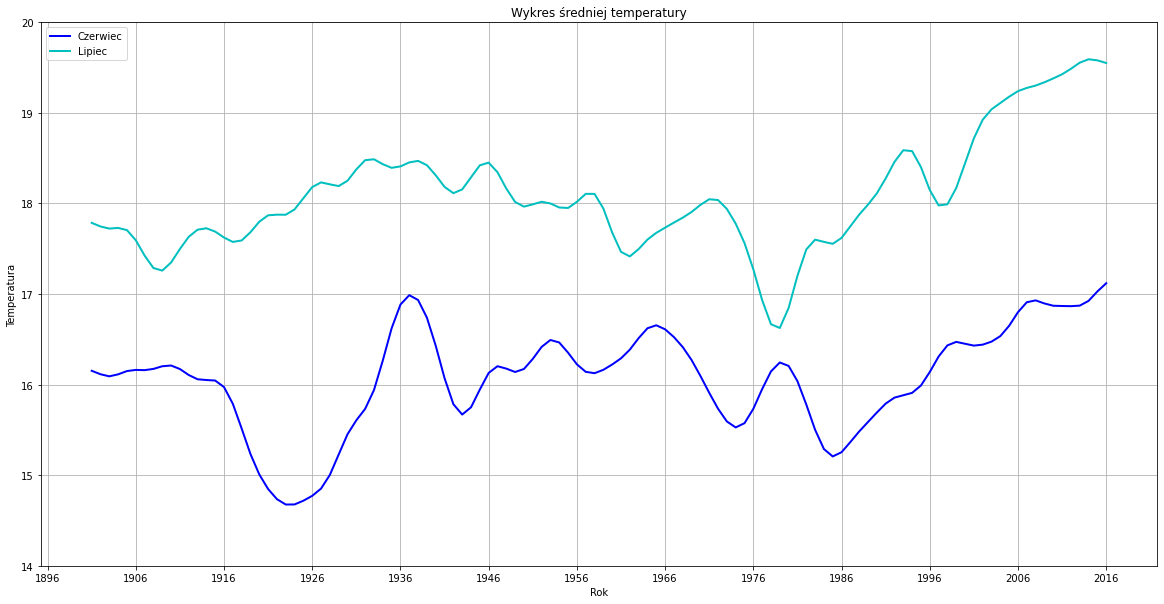

In [9]:
# użyj filtra Gaussa oraz wygładź dane
from scipy.ndimage.filters import gaussian_filter1d

jul_y = gaussian_filter1d(jul_y, sigma=2)
jun_y = gaussian_filter1d(jun_y, sigma=2)

# poinformuj plt o chęci nałożenia wykresów
plt.plot(x, jun_y, "b", label="Czerwiec", linewidth=2)
plt.plot(x, jul_y, "c", label="Lipiec", linewidth=2)

# przygotuj wspólną listę osi OY dla funkcji rysującej
import numpy as np
y = np.concatenate((jul_y, jun_y))
graph(x, y, margin_y=1, step_y=1)

# pokaż wykres
plt.show()

### Wniosek: tendencja wzrostowa średnich temperatur w okresie wakacyjnym na przestrzeni lat jest wyrażnie widoczna w ostatnim dwudziestoleciu.